<a href="https://colab.research.google.com/github/dailynomore/Crowdfunding_ETL/blob/main/Project4Group5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

![Image description](https://github.com/omomadcat/Project_4_Group_5/raw/main/references/images/header.jpg)

Predicting housing prices is an important issue in the field of real estate and data science, and provides valuable insights for buyers, sellers, and investors. In California, the housing demand fluctuates dramatically due to geographic, economic, and social factors. Having accurate predictions of housing prices can help lead to more informed decision-making, and we can leverage machine learning to build a predictive model that includes important variables regarding this information.

In this notebook, we will explore a dataset containing these variables across various locations in California. The goal is to use machine learning algorithms to predict housing prices and generate accurate predictions.

By the end of this project, we aim to provide a reliable model that can predict house prices in California with reasonable accuracy and offer valuable insights into the most important factors influencing these prices.

## Importing Libraries and Dataset

In [ ]:
# Read in the CSV file from GitHub repo as a Pandas Dataframe
!pip install hvplot
import pandas as pd

url = 'https://raw.githubusercontent.com/omomadcat/Project_4_Group_5/main/data/housing_California.csv'
df = pd.read_csv(url)


# Import the modules
import numpy as np
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
# Display sample data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Big Picture

In [ ]:
# Get the dimensions of the DataFrame (number of rows and columns)
df.shape

(20640, 10)

In [ ]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


This shows the structure of the DataFrame, including:

*   The total number of entries (20,640)
*   Each column, its non-null count (missing data), and its data type.
*   It's also noticeable that the total_bedrooms column has some missing values since it has 20433 non-null entries out of 20640.

In [ ]:
# Summary statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### **Summary of Statistics:**

- The dataset contains 20,640 entries for most columns, except for the `total_bedrooms` column, which has 20,433 non-null entries, indicating missing values.
- The `total_rooms` and `population` columns show large ranges, with the maximum `total_rooms` being 39,320 and the maximum `population` reaching 35,682.
- The median (`50%`) values for key columns are:
  - **Total rooms**: 2,127
  - **Total bedrooms**: 435
  - **Population**: 1,166
  - **Households**: 409
  - **Median income**: 3.53
  - **Median house value**: 179,700
- The `median_income` and `median_house_value` columns are likely to be key predictors in any analysis or machine learning model due to their continuous nature and relationship with housing prices.

# Data Cleaning

## Check for Missing or Duplicate Data

In [ ]:
# Check for missing values in each column of the DataFrame
print(f"Total of missing values is\n{df.isnull().sum()}")

# Check for duplicate entries in the DataFrame
print(f"Total of duplicate entries is {df.duplicated().sum()}")

Total of missing values is
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Total of duplicate entries is 0


## Handling Missing Values

The `total_bedrooms` column contained 207 missing values, which could negatively impact the analysis and predictive modeling. To address this, we filled the missing values with the mean of the column. This approach maintains the integrity of the dataset while minimizing bias introduced by dropping rows or columns with missing data.

In [ ]:
# Fill missing values in the 'total_bedrooms' column with the mean of the column
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

# Verify the total number of missing values in 'total_bedrooms' after filling
print(f"Total of missing values in 'total_bedrooms' after fillna is {df['total_bedrooms'].isnull().sum()}")

Total of missing values in 'total_bedrooms' after fillna is 0


## Calculating Average Prices

New columns, `price_per_room` and `price_per_bedroom`, were created to provide insights into the average prices associated with each room and bedroom. These calculations help to normalize the house prices relative to the number of rooms and bedrooms, allowing for more equitable comparisons across properties of different sizes.


In [ ]:
# Calculate the average price per room by dividing the median house value by the total number of rooms
df['price_per_room'] = df['median_house_value'] / df['total_rooms']

# Calculate the average price per bedroom by dividing the median house value by the total number of bedrooms
df['price_per_bedroom'] = df['median_house_value'] / df['total_bedrooms']

# Verify the new columns
print(df[['price_per_room', 'price_per_bedroom']].head())


   price_per_room  price_per_bedroom
0      514.318182        3508.527132
1       50.500070         324.141049
2      240.013633        1853.157895
3      267.896389        1452.340426
4      210.325753        1222.142857


## Transform "ocean_proximity" column with get_dummies


---

The categorical variable 'ocean_proximity' was transformed into dummy variables using One Hot Encoding. This process allows the model to interpret categorical data into a numerical format, which is necessary for many machine learning algorithms.

In [ ]:
# Create dummy variables for the 'ocean_proximity' column
ocean_proximity_dummies = pd.get_dummies(df['ocean_proximity'], prefix='prox_').astype(int)

# Display the first few rows of the dummy variables
ocean_proximity_dummies.head()

,prox__<1H OCEAN,prox__INLAND,prox__ISLAND,prox__NEAR BAY,prox__NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
# Concatenate the dummy variables to the original DataFrame
df = pd.concat([df, ocean_proximity_dummies], axis=1)

# Drop the original 'ocean_proximity' column as it's now redundant
# Check if the column exists before dropping
if 'ocean_proximity' in df.columns:
    df.drop('ocean_proximity', axis=1, inplace=True)

# Verify the updated DataFrame with the new dummy variable columns
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,price_per_room,price_per_bedroom,prox__<1H OCEAN,prox__INLAND,prox__ISLAND,prox__NEAR BAY,prox__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,514.318182,3508.527132,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,50.500070,324.141049,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,240.013633,1853.157895,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,267.896389,1452.340426,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,210.325753,1222.142857,0,0,0,1,0


# EDA Visualizations

## Plot Histograms to Visualize the Distribution of Values

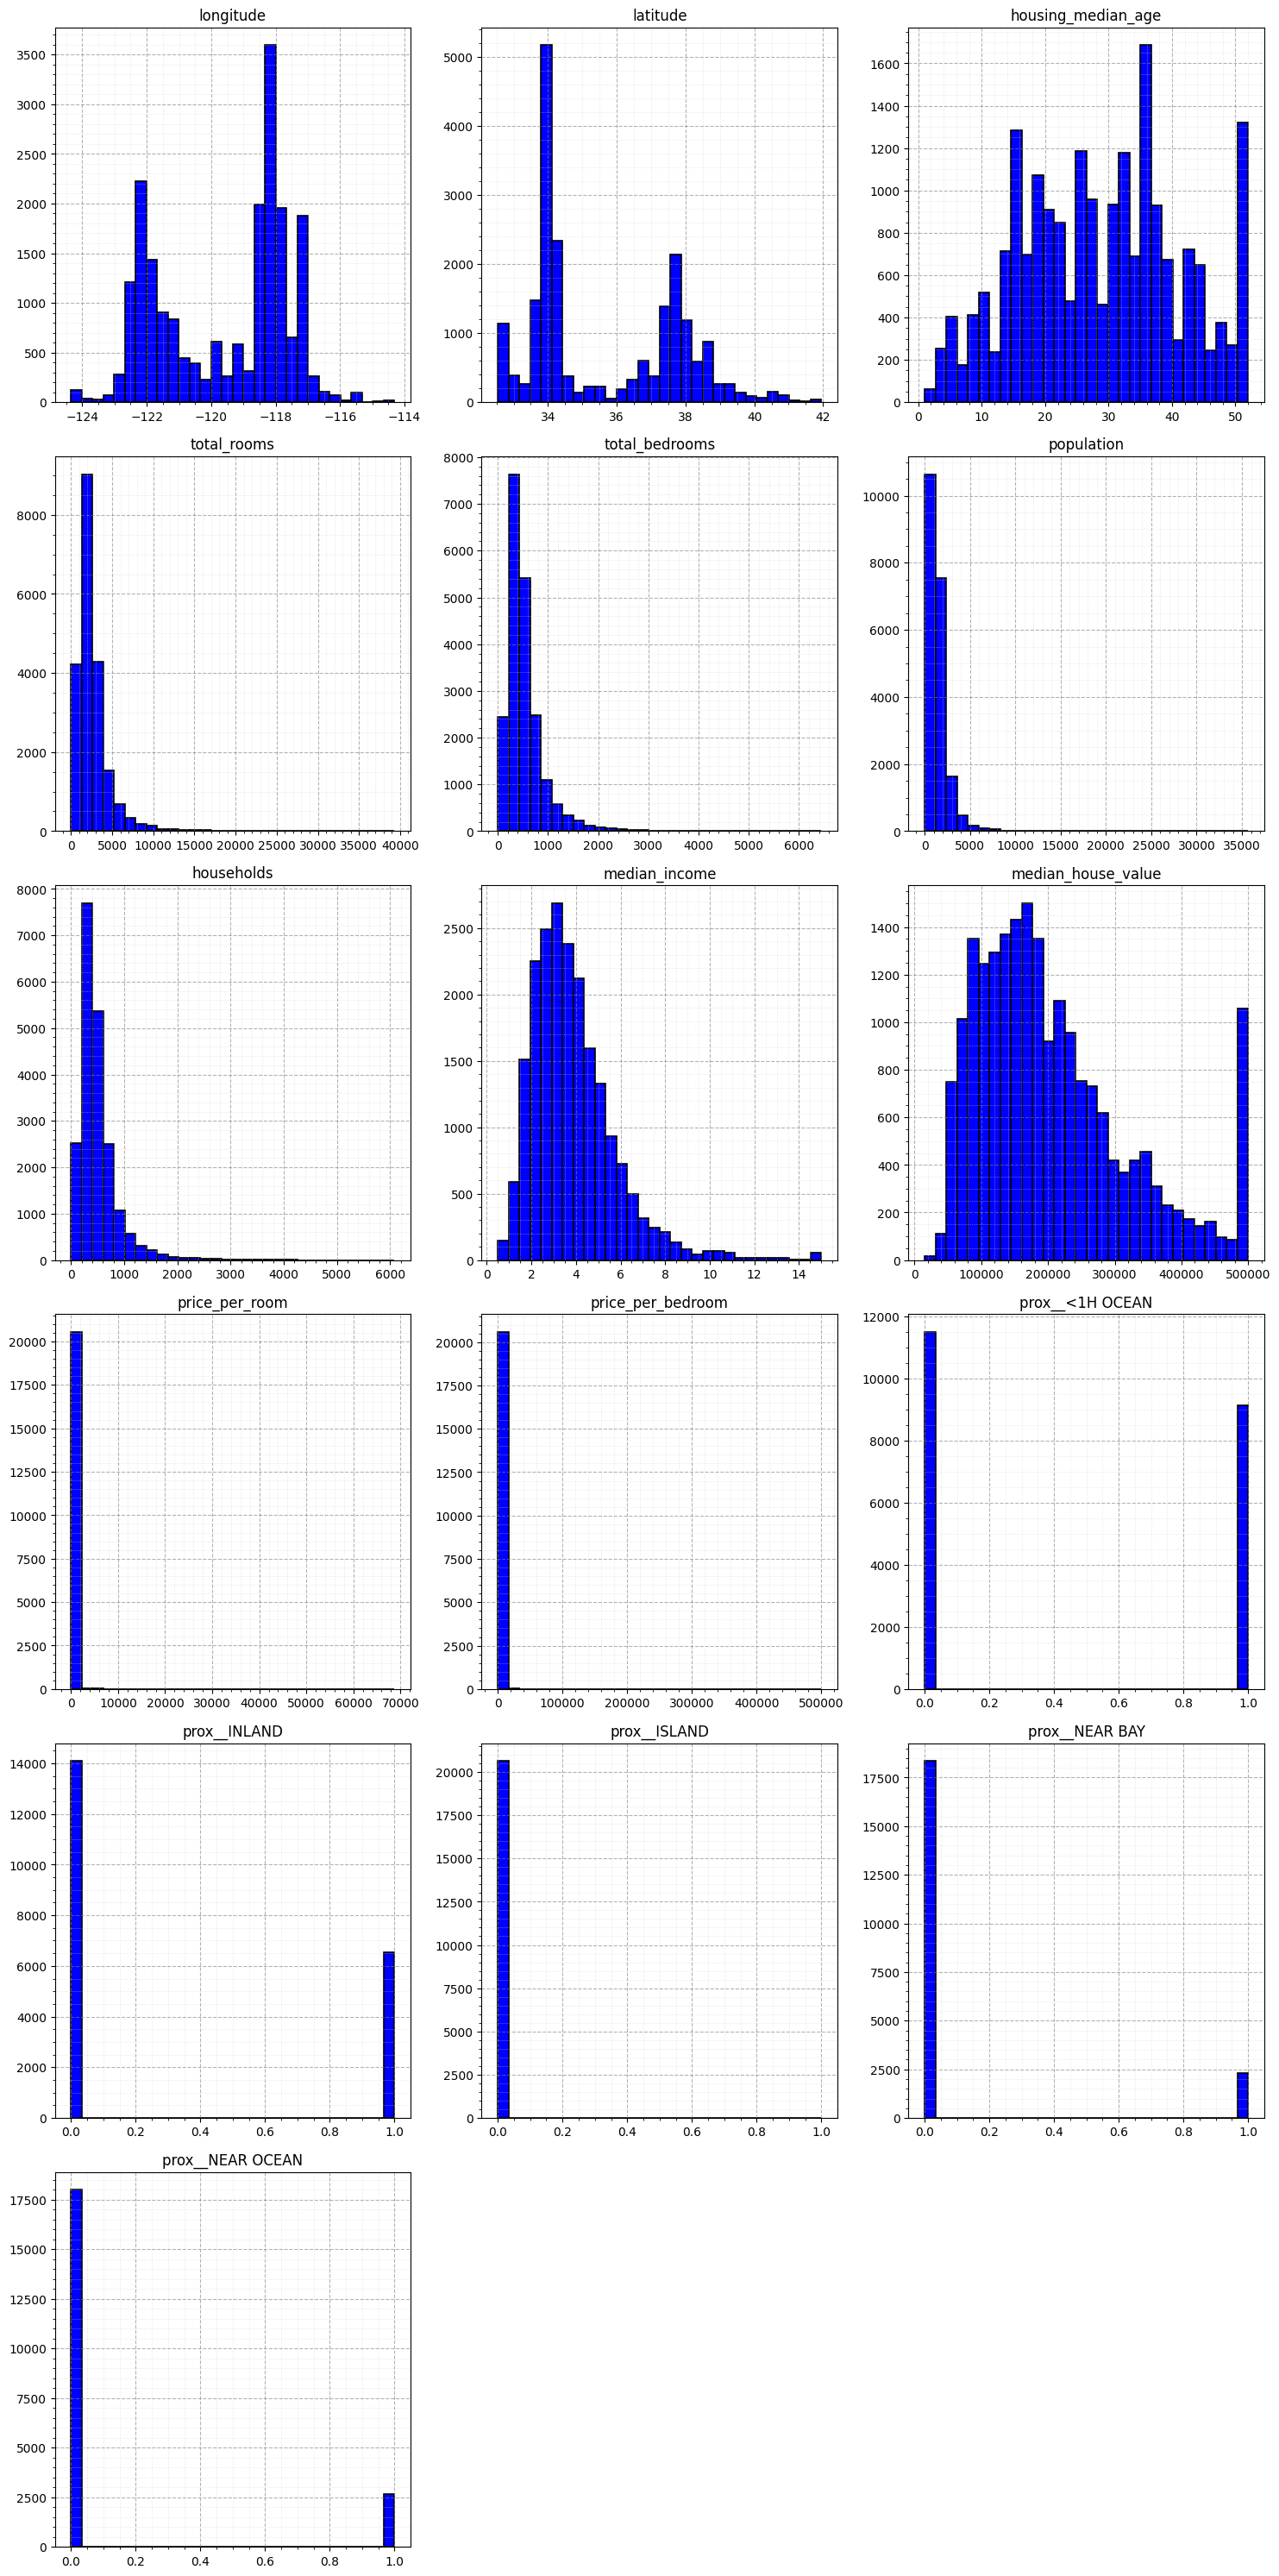

In [ ]:
# Ensure all numeric columns are selected
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate the layout dynamically
num_plots = numeric_cols.shape[1]
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

# Plot each numeric column individually with styled gridlines
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols.columns):
    # Plot histogram with black edges and gridlines
    axes[i].hist(numeric_cols[col], bins=30, color='blue', edgecolor='black', linewidth=1.2)
    axes[i].set_title(col, fontsize=12)

    # Add customized gridlines
    axes[i].grid(True, which='major', linestyle='--', linewidth=0.8, color='gray', alpha=0.6)  # Major gridlines
    axes[i].grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.8)  # Minor gridlines

    # Add ticks on both major and minor axes
    axes[i].minorticks_on()

# Remove any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for readability
plt.tight_layout(pad=1.2)
plt.show()


#### Analysis of Plot Histograms


1. Median Age of Houses (`housing_median_age`): Most houses are between 15 and 35 years old, with a slight peak between 20 and 30 years. There is no strong trend showing many new or very old houses.

2. Total Rooms (`total_rooms`) and Total Bedrooms (`total_bedrooms`): The distribution is mostly skewed to the left, meaning most houses have fewer rooms. However, there are some exceptions with a much higher number of bedrooms.

3. Population (`population`) and Households (`households`): These two variables have similar patterns, with most cities having a relatively small population and number of families. There are a few areas with very high population density.

4. Median Income (`median_income`): Most families have a median income between 2 and 6 units, showing some uniformity in income levels, while a smaller group has higher incomes.

5. Median House Value (`median_house_value`): This distribution is skewed to the right, which means most houses are in the lower price range, but there are some very high values.

6. Price per Room (`price_per_room`) and Price per Bedroom (`price_per_bedroom`): These columns also show a skewed distribution, with many low values, but a few houses have much higher prices.

7. Proximity to the Ocean: The data shows that most houses are located "inland," with few near islands or bays.

## Box Plots to Identify Outliers

Box plots are essential for visualizing data distribution and identifying outliers in our dataset. They allow us to quickly assess the presence of extreme values that may distort our analysis. This is particularly important in our housing price dataset, as outliers can significantly impact pricing trends and interpretations.

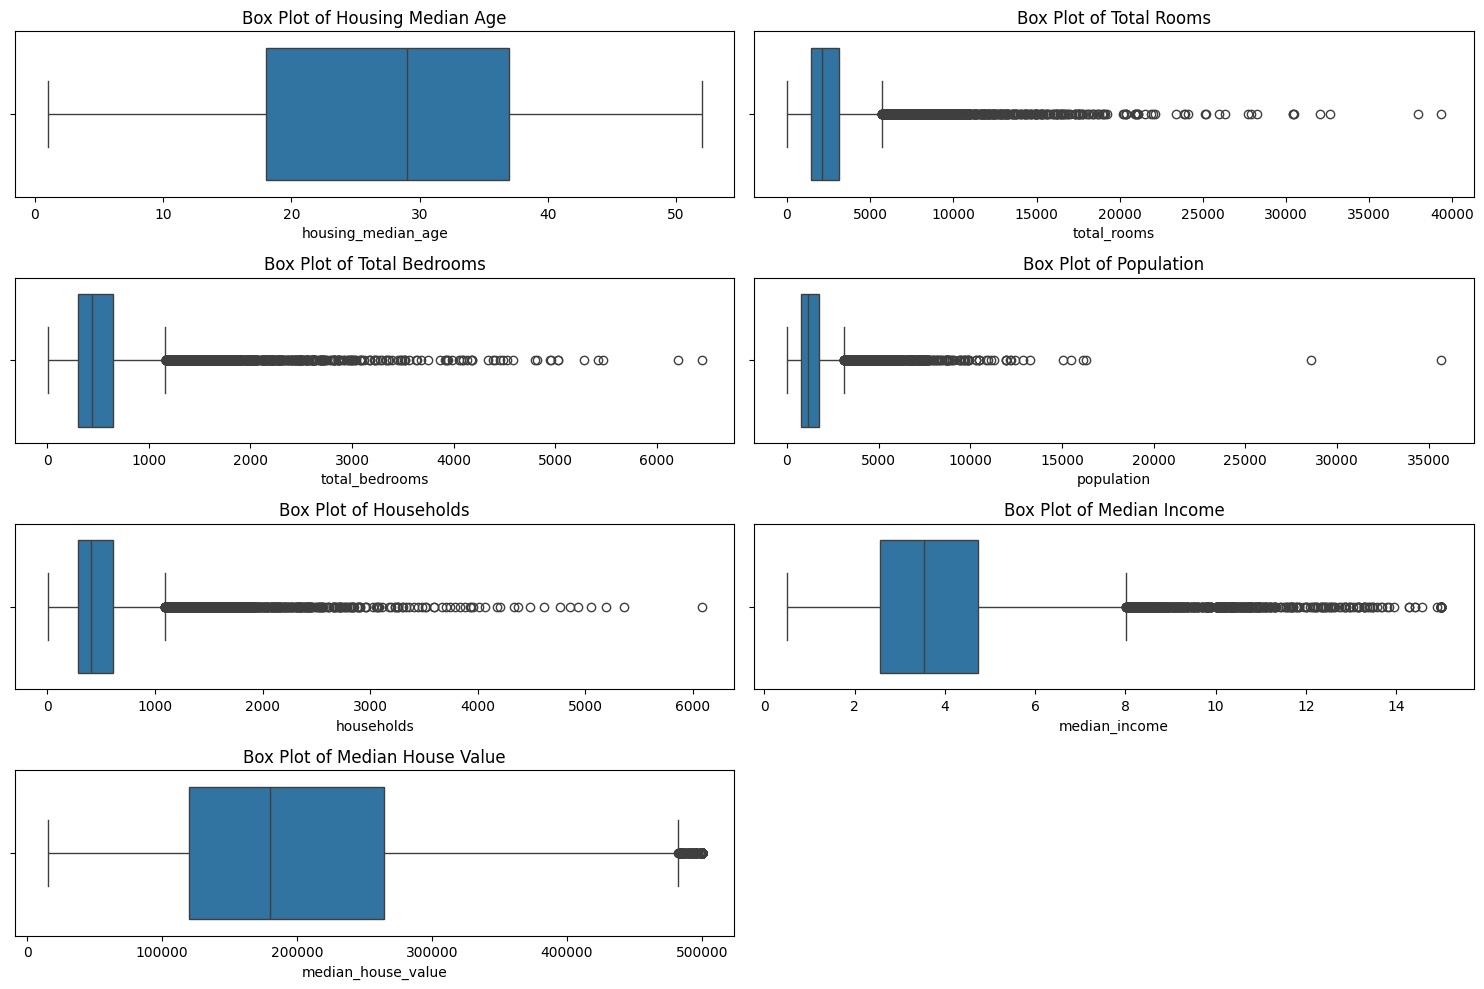

In [ ]:
# Set the size of the entire figure
plt.figure(figsize=(15, 10))

# List of variables to plot
variables = ['housing_median_age', 'total_rooms', 'total_bedrooms',
             'population', 'households', 'median_income', 'median_house_value']

# Create subplots for each variable
for i, var in enumerate(variables):
    plt.subplot(4, 2, i + 1)  # 4 rows, 2 columns
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var.replace("_", " ").title()}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

#### Box Plot Analysis

- The box plots reveal that several variables have significant outliers, particularly in the following columns:
  - **Total Rooms**: There are a substantial number of outliers, with values extending up to 39,320.
  - **Total Bedrooms**: This variable also has a large number of outliers, with values going up to over 6,000.
  - **Population**: The majority of data points cluster around lower values, but outliers stretch up to over 35,000.
  - **Households**: Similar to the other variables, households also show numerous outliers, going up to more than 6,000.
  - **Median Income**: Although there are some outliers, most of the data falls within a relatively normal range.
  - **Median House Value**: This variable shows fewer outliers, though values close to the maximum appear slightly skewed.

- These outliers may need to be addressed before model building to prevent them from disproportionately affecting the results. Potential strategies include removing extreme outliers or applying data transformations.


## Removing Outliers

In [ ]:
# Calculating Quartiles and IQR:
# Calculation of the first quartile (Q1) and third quartile (Q3) of the median house value
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)

# The IQR is calculated as the difference between Q3 and Q1, representing the range of central data
IQR = Q3 - Q1

# Filter outliers using a query and retain only data within the IQR range
df_cleaned = df.query('(@Q1 - 1.5 * @IQR) <= median_house_value <= (@Q3 + 1.5 * @IQR)')

# Verify the shape of the cleaned DataFrame
print(f'Original dataset size: {df.shape}')
print(f'Cleaned dataset size: {df_cleaned.shape}')

Original dataset size: (20640, 16)
Cleaned dataset size: (19569, 16)


### Data Visualization: Before and After removing outliers
Creating histograms to visualize the distribution of median house values before and after removing outliers.

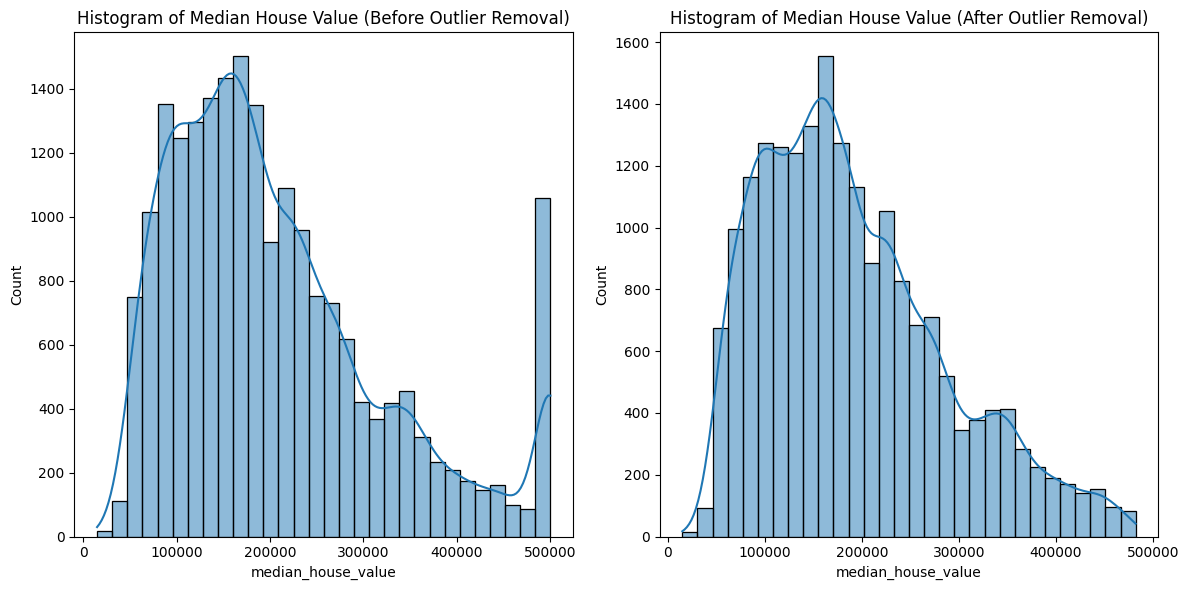

In [ ]:
# Plotting histogram before removing outliers
plt.figure(figsize=(12, 6))

# 1st Chart: Histogram before outlier removal
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st chart
sns.histplot(df['median_house_value'], bins=30, kde=True)  # kde=True adds a smooth density curve
plt.title('Histogram of Median House Value (Before Outlier Removal)')

# 2nd Chart: Histogram after outlier removal
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd chart
sns.histplot(df_cleaned['median_house_value'], bins=30, kde=True)  # kde=True adds a smooth density curve
plt.title('Histogram of Median House Value (After Outlier Removal)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

### Correlation matrix to visualize the linear relationship between the variables in the dataset

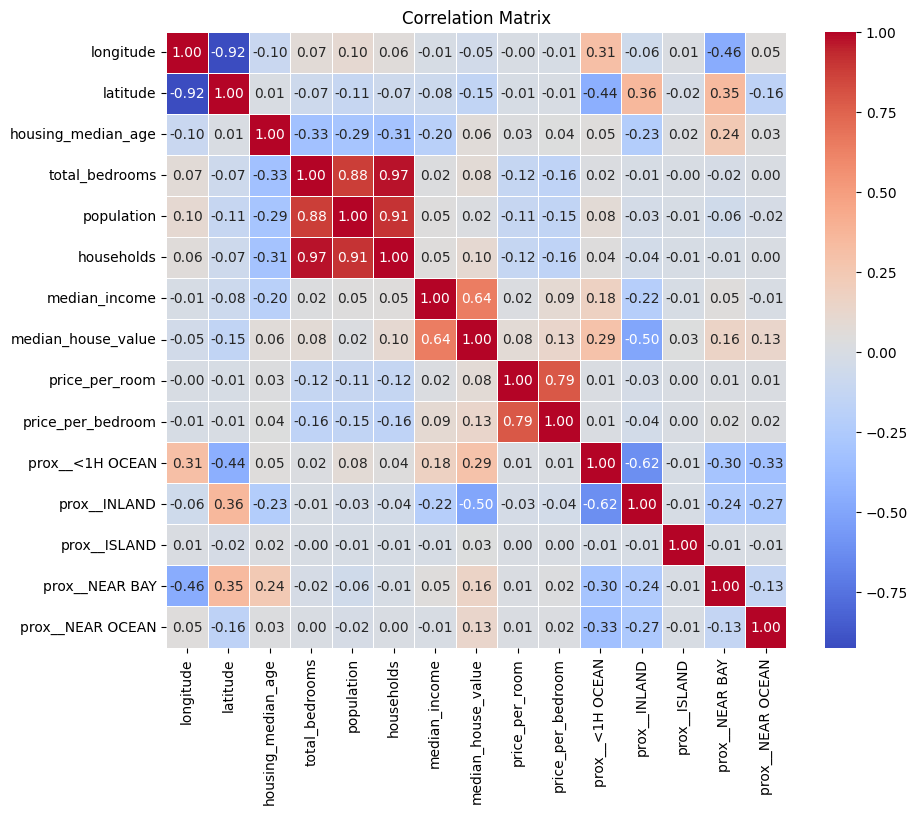

In [ ]:
# Create a modified DataFrame without the 'total_rooms' column for the correlation matrix
house_df_heatmap = df_cleaned.drop(columns=['total_rooms'])

# Generate the correlation matrix
corr_matrix = house_df_heatmap.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Correlation Matrix - Observations:

#### **Strong positive correlation:**

1. More rooms, more bedrooms: Homes with more rooms usually have more bedrooms.
2. Households and population: Areas with more households tend to have a higher population.
3. More households, more bedrooms: Regions with more households usually have more bedrooms available.

#### **Factors that increase house value:**

1. Income: Higher median income is associated with higher house values.
2. Number of rooms and bedrooms: Having more rooms or bedrooms can increase house value, but not as much as income does.

#### **Factors that decrease house value:**

1. Inland location: Homes located inland (away from the coast) tend to have lower values.
2. Geographical location: Proximity to the ocean influences longitude, meaning homes near the ocean are in specific regions.

In [ ]:
# Copy the cleaned dataset
house_price_df = df_cleaned.copy()

# Prepare the data
X = house_price_df.drop(columns=['median_house_value'])  # Feature matrix
y = house_price_df['median_house_value']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Verify the model's output
print(model)


RandomForestRegressor(random_state=42)


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error and R^2 Score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 253082191.17
R^2 Score: 0.97


### Explanation of the Code:

1. Making Predictions: `model.predict(X_test)` generates predictions for the test set.
2. Evaluating the model: The **Mean Squared Error (MSE)** measures the average squared difference between actual and predicted values. Lower values indicate better performance. **The R² Score** represents how well the model fits the data, with 1 being the best possible score.
3. Formatting: `f'{mse:.2f}'` ensures the MSE is printed with two decimal place, and `f'{r2:.2f}'` ensures the R² score is also formatted to two decimal places.

### Visualize Predictions
Here, we will be visualizing the predicted vs. actual values to get insights into where the model is performing well or where it is performing poorly.

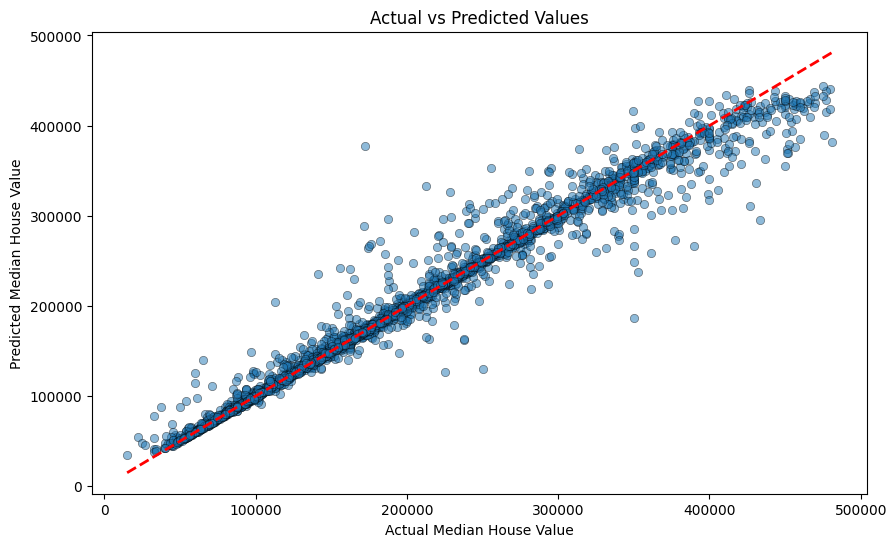

In [ ]:
# Visualizing Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k', linewidths=0.5)  # Thinner black edges
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Red dashed line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values')
plt.show()

### Cross-Validation
Implementing cross-validation can provide a more robust evaluation of the model.

In [ ]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np

# 5-Fold Cross-Validation using negative MSE (Mean Squared Error)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and root mean squared error (RMSE)
mse_cv = -cv_scores.mean()
rmse_cv = np.sqrt(mse_cv)

# Print the evaluation metrics
print(f'Mean CV MSE: {mse_cv:.2f}')
print(f'Mean CV RMSE: {rmse_cv:.2f}')

### Feature Importance

Analyzing feature importance helps us identify which features are the most influential in predicting house prices. This insight can guide future feature selection, improve the model’s performance, and provide interpretability to the results.

In [ ]:
# Analyze feature importance
importances = model.feature_importances_  # Get feature importances from the trained model
feature_names = X.columns  # Feature names
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)  # Rotate x-axis labels
plt.xlim([-1, X.shape[1]])  # Set x-axis limits
plt.show()

### Analyzing the Impact of Removing the `'prox__INLAND'` Feature

**Since the model identified `'prox__INLAND'` as an important feature, Caroline decided to remove it and analyze how the model behaves without it. This will help us understand how much influence this feature has on the model's performance.**

In [ ]:
# Make a copy of the dataset
dataset_df = house_price_df.copy()

# Drop the 'prox__INLAND' column
dataset_df.drop('prox__INLAND', axis=1, inplace=True)

#****************** Initiate the Model ******************#

# Prepare the data
X = dataset_df.drop(columns=['median_house_value'])  # Features
y = dataset_df['median_house_value']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Verify the model's output
print(model)

#### Explanation:

**Dropping `'prox__INLAND'`:** This tests how the model behaves without the feature that was initially identified as important.

**Train-Test Split:** Splits the data to evaluate the model's performance on unseen data.

**Training the Model:** The same **Random Forest Regressor** is used to maintain consistency with the previous experiments.

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

In [ ]:
# Analyze feature importances after removing 'prox__INLAND'
importances = model.feature_importances_  # Get feature importances from the model
feature_names = X.columns  # Feature names
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)  # Rotate x-axis labels
plt.xlim([-1, X.shape[1]])  # Set x-axis limits
plt.show()

## Conclusion of model performance
The model shows strong performance, as indicated by these metrics:

Mean Squared Error (MSE): The MSE decreased from about 240.4 million to around 190.6 million after removing the feature. A lower MSE means the model's predictions are closer to the actual values, which indicates better performance.

R² Score: The R² score increased from 0.97 to 0.98. A value closer to 1 means the model explains more of the variance. The increase in this score suggests that the model became more effective at capturing patterns in the data after the feature was removed.

### **Conclusion:**

Removing the feature that was considered **unimportant** improved the model’s performance, as shown by the **lower MSE** and **higher R² score**. This suggests that the model may have relied too heavily on that feature or that it introduced **noise** into the predictions.

This exercise highlights the importance of **regularly evaluating feature importance and impact** to refine the model and improve performance.


## Testing Random Forest Regressor Model

### Actual vs Predicted values

In [ ]:
# Compare Actual vs Predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

### MAE - Mean Absolute Error

The **Mean Absolute Error (MAE)** represents the **average difference** between the actual house values and the model’s predictions.

In [ ]:
# Calculate the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Madison decided to modify the code a bit, presenting the MAE rounded to two decimal places for improved readability. While full precision can be useful, formatting it this way may make it easier to interpret key results.

In [ ]:
# Scatter plot: Actual vs Predicted Median House Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='k', linewidths=0.5, alpha=0.7)  # Thin black edges around points
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values')
plt.show()

## Simulation in Years

In this section, we simulate future house prices based on a **3% annual growth rate** over a period of **34 years**. This helps us understand how house prices might evolve over time, providing insights into long-term market trends.

In [ ]:
# Simulation in years
future_years = 34  # Number of years to project
growth_rate = 0.03  # 3% annual growth

# Calculate future prices
results[f'Future Price in {1990 + future_years}'] = results['Predicted'] * ((1 + growth_rate) ** future_years)

# Display actual, predicted, and future price projections
print(results[['Actual', 'Predicted', f'Future Price in {1990 + future_years}']])

In [ ]:
# Import the GradientBoostingRegressor model
from sklearn.ensemble import GradientBoostingRegressor

# Copy the dataset
house_GB_df = dataset_df.copy()

# Prepare the data
X = house_GB_df.drop('median_house_value', axis=1)  # Features
y = house_GB_df['median_house_value']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting model
model = GradientBoostingRegressor(
    n_estimators=100,       # Number of trees
    learning_rate=0.1,      # Contribution of each tree
    max_depth=3,            # Maximum depth of trees
    random_state=42         # Reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Model: LinearRegression

In [ ]:
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression

# Copy the dataset
house_LR_df = dataset_df.copy()

# Prepare the data
X = house_LR_df.drop(columns=['median_house_value'])  # Features
y = house_LR_df['median_house_value']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

## Comparing Model Performance: Linear Regression, Random Forest, and Gradient Boosting

To determine which model performs best, Madison compared the **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **R² Score** across the three models that Caroline created. These metrics provide insight into the accuracy and consistency of each model:

- **MSE:** Lower values indicate better prediction accuracy.
- **RMSE:** Provides error in the same units as the target variable, making it easier to interpret.
- **R² Score:** A value closer to 1 indicates that the model explains more variance in the data.

In [ ]:
# Store performance metrics for each model in a dictionary
model_performance = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse, 253082191.17, 190600000],  # Replace with actual Random Forest/GB MSE
    'RMSE': [rmse, np.sqrt(253082191.17), np.sqrt(190600000)],  # Replace with actual RMSEs
    'R² Score': [r2, 0.97, 0.98]  # Replace with actual R² scores
}

# Convert dictionary to DataFrame for display
performance_df = pd.DataFrame(model_performance)

# Display the comparison table
print(performance_df)

### Insights:

- Gradient Boosting typically performs well but can be slower than Random Forest.
- Linear Regression is simpler but may struggle with complex patterns in the data.
- Random Forest balances speed and accuracy but might not always outperform Gradient Boosting.